### 加载数据集
加载数据集并查看数据的基本信息

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 支持中文和符号的显示
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

news = pd.read_csv("news.csv")
# 形状
print(news.shape)
# 默认显示它的前五行
display(news.head())

(200, 5)


,date,id,title,content,tag
0,20071011,20071011-9,我国第四个保税港区在海南洋浦成立,海南洋浦保税港区今天成立，这是继上海洋山、天津东疆、大连大窑湾之后，我国第四个保税港区。海南...,详细全文
1,20071011,20071011-8,西藏军区某边防团成功规避重大自然灾害,成都军区日前表彰了科学预测，有力防范，成功规避重大自然灾害的西藏军区某边防团。今年8月9日，...,详细全文
2,20071011,20071011-7,【道德楷模 文明风尚】单增：诚实做人 诚信兴业,西藏山南地区建筑工程建材工业总公司单(dan)增，从瓦工一直到总经理，不管职务怎么变化，他诚...,详细全文
3,20071011,20071011-6,河北钢铁业：“减”出来的高效益,今年以来，河北省钢铁行业的“压劣扶优”进程进一步加快，目前全省已累计淘汰落后炼铁、炼钢能力1...,详细全文
4,20071011,20071011-5,中国北车集团：自主创新装备中国轨道交通,记者：这是目前正在京沪铁路线上运行的大功率交流传动的货运机车，它也是目前我国技术水平最高的火...,详细全文


### 文本预处理
文本数据是一种非结构化数据，与传统分析数据不同。
文本预处理包含：
1、缺失值的处理
2、重复值处理
3、文本内容清洗
4、分词
5、停用词处理

#### 缺失值的处理
检测缺失值，并对缺失值进行处理

In [2]:
news.isnull().sum()
# news.info()

date       0
id         0
title      0
content    0
tag        0
dtype: int64

内容有缺失值，我们用title来填充content的缺失值

In [3]:
index = news[news["content"].isnull()].index
news["content"][index] = news["title"][index]
news.isnull().sum()

<ipython-input-3-51911b84ac6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news["content"][index] = news["title"][index]
D:\Install\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


date       0
id         0
title      0
content    0
tag        0
dtype: int64

In [4]:
# 检查填充效果
news.loc[index].sample(1)

ValueError: a must be greater than 0 unless no samples are taken

#### 重复值的处理
重复数据对文本分析和建模没有任何帮助。我们可以删除重复数据

In [5]:
print(news.duplicated().sum())
display(news[news.duplicated()])

0


,date,id,title,content,tag


In [6]:
#删除重复值，并检测是否删除成功
news.drop_duplicates(inplace=True)
print(news.duplicated().sum())

0


#### 文本内容清洗
文本中的标点符号与一些特殊的标点符号对文本分析的作用不大，我们可以将其清除

In [7]:
import re

re_obj = re.compile(r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~！、，。？（）：【】《》‘’“”\s]+")
def clear(text):
    return re_obj.sub("",text)
news["content"] = news["content"].apply(clear)
news.sample(5)

,date,id,title,content,tag
136,20180925,20180925-12,普京：向叙提供S-300为保证俄军安全,24日俄罗斯总统普京与以色列总理内塔尼亚胡通电话在谈及向叙利亚提供S－300防空导弹系统时普...,国外
102,20180323,20180323-16,国内联播快讯,出租车司机背景核查监管加强交通运输部公安部日前联合发布通知要求切实做好出租汽车驾驶员包括网约...,国外
0,20071011,20071011-9,我国第四个保税港区在海南洋浦成立,海南洋浦保税港区今天成立这是继上海洋山天津东疆大连大窑湾之后我国第四个保税港区海南洋浦保税港...,详细全文
129,20180624,20180624-13,中国承建肯尼亚内马铁路一期全面推进,作为一带一路在非洲的重要工程之一由中国公司承建的肯尼亚内马铁路项目一期工程目前正在全面推进项...,国外
56,20190920,20190920-9,大型文献专题片《我们走在大路上》今晚播出第九集和第十集,大型文献专题片我们走在大路上今晚20日在中央广播电视总台央视综合频道黄金时间8点档播出第九集...,详细全文


#### 分词
分词是将连续的文本，分割成语义合理的若干词汇序列。 通过jieba实现分词功能

In [8]:
import jieba
s = "今天，外面下了一场很大的雨。"
words = jieba.cut(s)
print(list(words))
words = jieba.lcut(s)
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\95435\AppData\Local\Temp\jieba.cache
Loading model cost 1.075 seconds.
Prefix dict has been built successfully.


['今天', '，', '外面', '下', '了', '一场', '很大', '的', '雨', '。']
['今天', '，', '外面', '下', '了', '一场', '很大', '的', '雨', '。']


In [9]:
def cut_word(text):
    return jieba.cut(text)

news["content"] = news["content"].apply(cut_word)
news.sample(5)

,date,id,title,content,tag
101,20120720,20120720-19,国际联播快讯,<generator object Tokenizer.cut at 0x000002C18...,国外
43,20110501,20110501-4,温家宝“五一”节到保障性住房建设工地看望工人,<generator object Tokenizer.cut at 0x000002C18...,详细全文
12,20151123,20151123-11,【脱贫攻坚进行时】财政撬动金融 精准扶贫创新路,<generator object Tokenizer.cut at 0x000002C18...,详细全文
34,20151111,20151111-13,国内联播快讯,<generator object Tokenizer.cut at 0x000002C18...,详细全文
21,20080517,20080517-5,【抗震救灾 众志成城】陕西、甘肃、云南、重庆救灾工作有序推进,<generator object Tokenizer.cut at 0x000002C18...,详细全文


#### 停用词处理
停用词是指在我们语句中大量出现，但对我们文本分析又没有意义的词。对于这样的词汇，我们通常将其删除，好处：
1、可以降低存储空间消耗
2、可以减少计算时间消耗

In [10]:
# 两种方案，可以使用set、list
# 建议使用set。因为set的底层是哈希码可以很快找到对应的元素，并且set集合不可以有重复元素
# List要一个个遍历，效率慢，而且存在重复元素的情况
def get_stopwords():
    s = set()
    with open("stopwords.txt",encoding="utf-8") as f:
        for line in f:
            s.add(line.strip())
    return s

def remove_stopwords(words):
    return [word for word in words if word not in stopwords]

stopwords = get_stopwords()
news["content"] = news["content"].apply(remove_stopwords)
news.sample(5)

,date,id,title,content,tag
90,20100721,20100721-17,国际简讯,"[卡梅伦英, 石油, 稳定, 符合, 英美, 利益, 英国首相, 卡梅伦, 20, 日, 华...",详细全文
103,20120720,20120720-18,美国丹佛发生枪击事件 数十人死伤,"[美国, 中部, 时间, 20, 号, 凌晨, 美国, 科罗拉多州, 丹佛市, 发生, 枪击...",国外
125,20160328,20160328-2,李克强在国务院第四次廉政工作会议上强调：转变职能 完善机制 强化监管 深入推进政府系统党风廉...,"[3, 月, 28, 日, 国务院, 召开, 第四次, 廉政, 工作, 会议, 中共, 中央...",国外
24,20110621,20110621-5,胡锦涛回到北京,"[胡锦涛, 回到, 北京]",详细全文
172,20120424,20120424-8,贾庆林会见泰国总理英拉,"[贾庆林, 转达, 了, 温家宝, 总理, 诚挚, 问候, 贾庆林, 说, 上, 周总理, ...",国内


### 数据的探索
#### 类别数量分布


详细全文    99
国内      51
国外      50
Name: tag, dtype: int64


<AxesSubplot:>

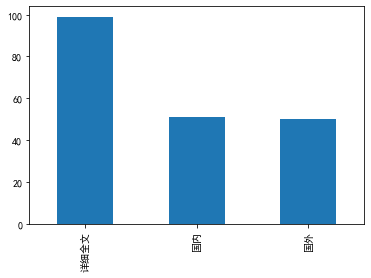

In [11]:
t = news["tag"].value_counts()
print(t)
t.plot(kind="bar")

#### 年份数量分布

2018    57
2010    34
2012    26
2016    18
2011    18
2015    11
2008     9
2017     9
2007     9
2019     9
Name: date, dtype: int64


<AxesSubplot:>

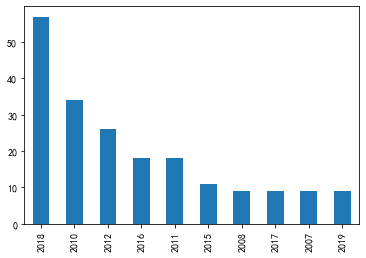

In [12]:
t = news["date"].astype(str).str[:4]
t1 = t.value_counts()
# print(t)
print(t1)
t1.plot(kind="bar")

### 词汇统计
#### 词汇量统计

In [13]:
from itertools import chain
from collections import Counter

li_2d = news["content"].tolist()
# 将二维列表扁平化为一维列表
# 比如[[1,2],[3,4],[5,6]] -> [1,2,3,4,5,6]
li_1d = list(chain.from_iterable(li_2d))
print(f"词汇总量：{len(li_1d)}")
c = Counter(li_1d)# 字典
print(f"不重复词汇总量：{len(c)}")
common = c.most_common(15) # 统计词频最高的15个词
print(common)

词汇总量：39455
不重复词汇总量：10161
[('和', 552), ('了', 513), ('中国', 272), ('是', 264), ('发展', 226), ('等', 204), ('将', 191), ('为', 178), ('对', 170), ('要', 165), ('日', 142), ('年', 139), ('国家', 136), ('月', 130), ('工作', 121)]


#### 词频统计

<BarContainer object of 15 artists>

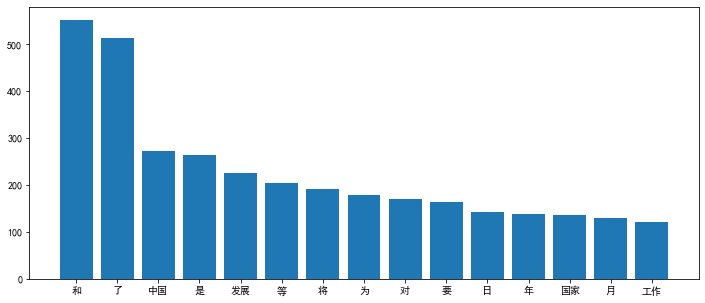

In [14]:
vocabulary,frequecy = [],[]
for v,f in common:
    vocabulary.append(v)
    frequecy.append(f)
plt.figure(figsize=(12,5))# 创建一个画布
plt.bar(vocabulary,frequecy)

#### 百分比统计

39455
['1.40', '1.30', '0.69', '0.67', '0.57', '0.52', '0.48', '0.45', '0.43', '0.42', '0.36', '0.35', '0.34', '0.33', '0.31']


<BarContainer object of 15 artists>

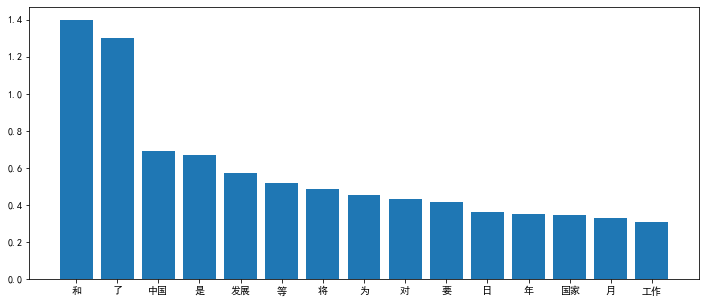

In [15]:
total = len(li_1d)
print(total)
percentage = [v * 100 / total for v in frequecy]
print([f"{v:.2f}" for v in percentage])
plt.figure(figsize=(12,5))# 创建一个画布
plt.bar(vocabulary,percentage)

#### 新闻词汇长度统计

<BarContainer object of 15 artists>

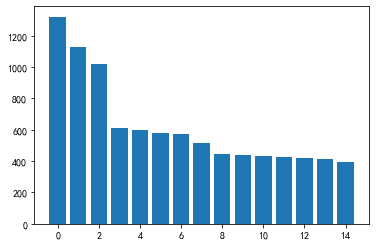

In [19]:
num = [len(li) for li in li_2d]
length = 15 #取15个
plt.bar(range(length),sorted(num,reverse=True)[:length])

#### 新闻词汇长度分布统计

(array([82., 76., 28.,  7.,  4.,  0.,  0.,  1.,  1.,  1.]),
 array([   3. ,  134.9,  266.8,  398.7,  530.6,  662.5,  794.4,  926.3,
        1058.2, 1190.1, 1322. ]),
 <BarContainer object of 10 artists>)

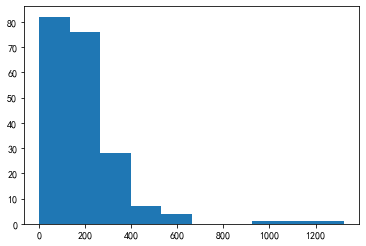

In [20]:
# 直方图
plt.hist(num)

### 生成词云图
python中，wordcloud模块提供了生成词云图的模块

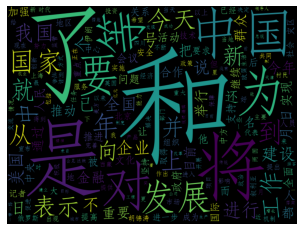

In [21]:
from wordcloud import WordCloud
# 需要指定字体位置，否则中文无法正常显示
wc = WordCloud(font_path=r"C:\Windows\Fonts\STFANGSO.ttf",width=800,height=600)
li_2d = news["content"].tolist()
# 将二维列表扁平化为一维列表
# 比如[[1,2],[3,4],[5,6]] -> [1,2,3,4,5,6]
li_1d = list(chain.from_iterable(li_2d))
join_words = " ".join(li_1d)
img = wc.generate(join_words)
plt.imshow(img)
# 关闭坐标轴
plt.axis('off')
wc.to_file("wordcloud.png")

(-0.5, 779.5, 779.5, -0.5)

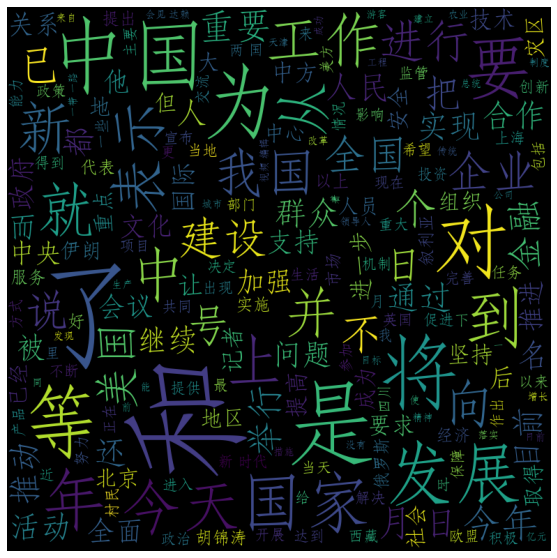

In [22]:
# 自定义背景
wc = WordCloud(font_path=r"C:\Windows\Fonts\STFANGSO.ttf",mask=plt.imread("map.jfif"))
img = wc.generate(join_words)
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')

### 文本向量化
对文本数据进行建模，有两个问题需要解决：

1、模型进行数学运算，因此需要数值类型的数据，而文本不是数据类型数据

2、模型需要结构化数据，而文本是非结构化数据

将文本转化为数值特征向量的过程，称为文本向量化。将文本向量化，可以分为如下步骤：

1、对文本分词，拆分成更容易处理的单词

2、将单词转化为数值类型，即使用合适的数值来表示每个单词

同样，需要注意的是，文本是非结构化数据，在向量化过程中，需要将其转化为结构化数据

#### 词袋模型
词袋模型，就是一个转满单词的袋子，实际上，词袋模型是一种能够将文本向量化的方式。在词袋模型中，每个文档为一个样本，每个不重复的单词为一个特征。单词在文档中出现的次数作为特征值


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
doc = [
    "Where there is a will,there is a way.",
    "There is no roral road to learning."
]
bag = count.fit_transform(doc)
# bag是一个稀疏矩阵
print(bag)
# 调用稀疏矩阵toarray方法，将稀疏矩阵转化为ndarray对象
print(bag.toarray())

  (0, 8)	1
  (0, 5)	2
  (0, 0)	2
  (0, 9)	1
  (0, 7)	1
  (1, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 4)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	1
[[2 0 0 0 0 2 0 1 1 1]
 [1 1 1 1 1 1 1 0 0 0]]


In [26]:
# 获取所有特征（单词名称）
print(count.get_feature_names())
# 输出单词与编号的对应关系
print(count.vocabulary_)

['is', 'learning', 'no', 'road', 'roral', 'there', 'to', 'way', 'where', 'will']
{'where': 8, 'there': 5, 'is': 0, 'will': 9, 'way': 7, 'no': 2, 'roral': 4, 'road': 3, 'to': 6, 'learning': 1}


经过训练好，CountVectorizer就可以对未知文档（训练集外的文档）进行向量化。当然向量化的特征仅为训练集中的单词特征，如果未知单词不在训练集中，则在词袋模型中无法体现

In [27]:
test_doc = ["While there is life,there is hope.","No pain,no gain."]
t = count.transform(test_doc)
print(t.toarray())

[[2 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]]


### TF-IDF
通过CountVecorizer，我们能够将文本向量化。在向量化的过程中，我们使用每个文档中单词的词频数作为对应的特征的取值。这是合理的，因为单词出现的次数越多，就认为比单词出现的次数少的单词更加重要。

然而，这是相对的，有些单词我们不能仅以当前文档的词频数来衡量，还要考虑语料库中，在其他文档出现的次数。因为有些单词，确实是非常常见的，其在预料库中所有文档中，可能会频繁出现，对于这样的词我们应该降低其重要性。

TF-IDF可以用来调整单词在文档中的权重。其由两部分组成：

1、TF(Term-Frequency)词频，指一个单词在文档中出现的次数

2、IDF(Inverse-Document-Frequency)逆文档频率

idf的计算方式：
##### idf(t) = log(n/(1+df(t))

其中n为语料库中的文档的总数，df(t)为语料库中含有单词t的文档个数。最终TF-IDF的值为：
##### tf-idf(t,d) = tf(t,d) * idf(t) (词频*权重)


In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

count = CountVectorizer()
doc = [
    "Where there is a will,there is a way.",
    "There is no roral road to learning."
]
bag = count.fit_transform(doc)
tfidf = TfidfTransformer()
t = tfidf.fit_transform(bag)
# tfidftransform转换结果也是稀疏矩阵
print(t.toarray())

[[0.53594084 0.         0.         0.         0.         0.53594084
  0.         0.37662308 0.37662308 0.37662308]
 [0.29017021 0.4078241  0.4078241  0.4078241  0.4078241  0.29017021
  0.4078241  0.         0.         0.        ]]


此外scikit-learn中，同时提供了一个类TfidfVectorizer，也可以将文档转换为TF-IDF值，也就是说该类集成了CountVectorizer和TfidfTransform两个类的功能

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc = [
    "Where there is a will,there is a way.",
    "There is no roral road to learning."
]
tfidf = TfidfVectorizer()
t = tfidf.fit_transform(doc)
print(t.toarray())

[[0.53594084 0.         0.         0.         0.         0.53594084
  0.         0.37662308 0.37662308 0.37662308]
 [0.29017021 0.4078241  0.4078241  0.4078241  0.4078241  0.29017021
  0.4078241  0.         0.         0.        ]]


### 建立模型
#### 构建训练集和测试集
我们需要将每条新闻的词汇进行整理。目前，我们的文本内容已经完成了分词处理，但是词汇是以列表的形式呈现，为了方便后续的向量化与建模操作，我们将每条新闻的词汇组合在一起，成为字符串类型，使用空格分隔


In [31]:
def join(text_list):
    # join返回通过指定字符连接序列中元素后生成的新字符串
    return " ".join(text_list)

news["content"] = news["content"].apply(join)
news.sample(5)

,date,id,title,content,tag
196,20180901,20180901-26,博茨瓦纳总统 加纳总统 科特迪瓦总统 布基纳法索总统分别向人民英雄纪念碑敬献花圈,博茨瓦纳 总统 马西 西 1 日 下午 前往 北京天安门广场 向 人民英雄纪念碑 敬献 花圈...,国内
128,20180624,20180624-14,国际联播快讯,伊拉克 总理 阿巴 迪 萨德尔 组建 联盟 23 日 伊拉克 什叶派 宗教 领袖 萨德尔 领...,国外
124,20120720,20120720-10,贺国强强调:提高监督检查工作水平,中共 中央政治局常委 中央纪委 书记 贺国强 20 日 京 出席 了 加快 转变 经济 发展...,国外
70,20120130,20120130-11,中东部雨雪天扰节后春运,现在 来 给 观众 朋友 介绍 特别 天气 情况 从 昨天 傍晚 山东 淄博 潍坊 青岛 等...,详细全文
187,20180901,20180901-32,第十八届亚运会：女篮 女排分别夺冠,第十八届 亚运会 女篮 和 女排 决赛 刚刚 结束 中国队 分别 夺冠 乒乓球 男单 和 女...,国内


我们需要将标签列(tag)转换为离散值

In [33]:
news["tag"] = news["tag"].map({"详细全文":0,"国内":0,"国外":1})
news["tag"].value_counts()

0    150
1     50
Name: tag, dtype: int64

这样，我们可以对样本进行切分，构建训练集和测试集


In [34]:
from sklearn.model_selection import train_test_split

X = news["content"]
Y = news["tag"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
print("训练样本数：",Y_train.shape[0],"测试样本数：",Y_test.shape[0])

训练样本数： 150 测试样本数： 50


### 实施向量化转换
数据集X还是文本类型，我们需要对其进行向量化操作。使用TfidfVectorizer类，在训练集上进行训练，然后分别对训练集和测试集实施转换

In [35]:
# min_df表示词出现的最少次数。
# ngram_rang表示二元组，保持词的顺序。比如武松打虎 -> 武松，打，虎 -> 武松打也是一个词，打虎也是一个词。这样顺序就不会错
# (1,2)表示一元组，二元组。(1,3)表示一元组，二元组，三元组
vec = TfidfVectorizer(min_df=2,ngram_range=(1,2))
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)
display(X_train,X_test)

<150x3750 sparse matrix of type '<class 'numpy.float64'>'
	with 14647 stored elements in Compressed Sparse Row format>

<50x3750 sparse matrix of type '<class 'numpy.float64'>'
	with 3029 stored elements in Compressed Sparse Row format>

In [37]:
# 数据量大的话会报内存错误
# X_train.toarray()
# 计算一下需要多少内存
X_train.shape[0]*X_train.shape[1]*8/(1024**3)

0.004190951585769653

### 特征选择
使用词袋模型向量化后，会产生过多的特征，这些特征对计算和存储造成巨大的压力，同时，并非所有的特征对建模都有帮助，基于以上原因，我们将数据送入模型之前，先进行特征选择。

我们可以使用方差分析(ANOVO)来进行特征选择，比如选择与目标分类变量最相关的2000个特征。方差分析用来分析来自不同总体的样本均值是否相等，进而可以用来检验分类变量与连续变量之间是否相关。检验方式为，根据分类变量的不同取值，将样本进行分组。首先计算组内差距SSE与组间差距SSM，然后计算：
##### F = SSM/(c-1)/SSE/(n-c)
其中n为样本数量，c为类别数量(分组数量)。得出F，服从自由度为(c-1,n-c)的F分布。因此我们可以根据该值的大小来判断不同分组的均值是否相等

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# f_classif就是进行方差分析的
selector = SelectKBest(f_classif,k=min(2000,X_train.shape[1]))
selector.fit_transform(X_train,Y_train)
X_train = selector.transform(X_train).astype(np.float32)
X_test = selector.transform(X_test).astype(np.float32)
print(X_train.shape,X_test.shape)

(150, 2000) (50, 2000)


### 训练与评估模型
使用贝叶斯公式实现分类与预测。朴素贝叶斯算法是基于概率的分类算法，其前提是要求特征之间独立。实际上使用的就是全概率公式与贝叶斯公式。朴素贝叶斯公式在文本分类场景中是非常合适的

#### 算法说明
例如，我们现在要预测“我是中国人”,该样本属于哪个类别。实际上，我们只需要计算该样本属于哪个类别的概率大就可以了。即，

P = (Y=国内|X=我，是，中国,人)与P = (Y=国外|X=我，是，中国,人)两个概率的大小，模型预测输出就是概率较大的那个类别。

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

X_train = X_train.toarray()
X_test = X_test.toarray()
nb = GaussianNB()
nb.fit(X_train,Y_train)
print(nb.score(X_train,Y_train))
print(nb.score(X_test,Y_test))
print(classification_report(Y_test,nb.predict(X_test)))

1.0
0.68
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        38
           1       0.17      0.08      0.11        12

    accuracy                           0.68        50
   macro avg       0.46      0.48      0.46        50
weighted avg       0.61      0.68      0.64        50



### 总结
文本数据预处理

TF-IDF文本向量化

词云图的生成

方差分析实现特征选择

朴素贝叶斯实现文本分类

### 拓展点
尝试其他分类算法，逻辑回归，多层感知机等